In [1]:
%matplotlib inline

import numpy as np
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt
import tensorflow as tf

def gen_data(start, stop, num_data, plot=True):
    x = np.linspace(start, stop, num=num_data)
    coeff = np.random.uniform(low=-1.0, high=1.0, size=6)
    noise = np.random.normal(loc=0.0, scale=1.0, size=num_data)
    
    true_y = polyval(x, coeff)
    noise_y = true_y + 0.1 * noise
    
    if plot:
        plt.plot(x, true_y, 'r--')
        plt.plot(x, noise_y, 'o')
        plt.show()
    
    x = np.reshape(x, [num_data, 1])
    noise_y = np.reshape(noise_y, [num_data, 1])
    data = np.concatenate([x, noise_y], axis=1)
    
    return data

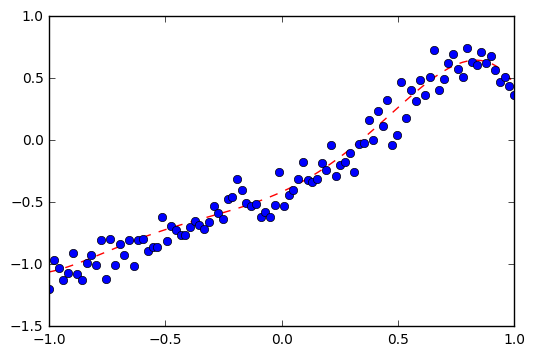

In [2]:
data = gen_data(-1, 1, 100)
np.random.shuffle(data)

train = data[:50, :]
test = data[50:, :]

train_x, train_y = np.split(train, 2, axis=1)
test_x, test_y = np.split(test, 2, axis=1)

In [3]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

x_0 = tf.ones_like(x)
x_1 = x
x_2 = tf.pow(x, 2.)
x_3 = tf.pow(x, 3.)
x_4 = tf.pow(x, 4.)
x_5 = tf.pow(x, 5.)
x_6 = tf.pow(x, 6.)
x_7 = tf.pow(x, 7.)
x_8 = tf.pow(x, 8.)
x_9 = tf.pow(x, 9.)
x_10 = tf.pow(x, 10.)


In [4]:
capacity = 10

poly_x = tf.concat([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10], 1)
poly_init = tf.random_uniform([capacity+1,1], minval=-1.0, maxval=1.0, dtype=tf.float32)
poly_w = tf.Variable(poly_init, dtype=tf.float32, name='w')
poly_model = tf.matmul(poly_x, poly_w)
poly_MSE = tf.reduce_mean(tf.pow(poly_model - y, 2.0))

In [5]:
optimizer = tf.train.GradientDescentOptimizer(1e-3).minimize(poly_MSE)

In [6]:
# create TF session
sess = tf.Session()

# TF variable have to initialize before optimization
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
max_step = 1000
for i in range(max_step):
    sess.run(optimizer, {x:train_x, y:train_y})
    
    now_MSE = sess.run(poly_MSE, {x:train_x, y:train_y})
    
    if i%100 == 0:
        print('step: %d,  MSE: %f' % (i, now_MSE))
        
print('\ntest error,  MSE: %f' % (sess.run(poly_MSE, {x:test_x, y:test_y})))

step: 0,  MSE: 1.275986
step: 100,  MSE: 0.988514
step: 200,  MSE: 0.778476
step: 300,  MSE: 0.622259
step: 400,  MSE: 0.504132
step: 500,  MSE: 0.413457
step: 600,  MSE: 0.342928
step: 700,  MSE: 0.287437
step: 800,  MSE: 0.243348
step: 900,  MSE: 0.208025

test error,  MSE: 0.130333
